In [8]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
import scipy.integrate

# plotting


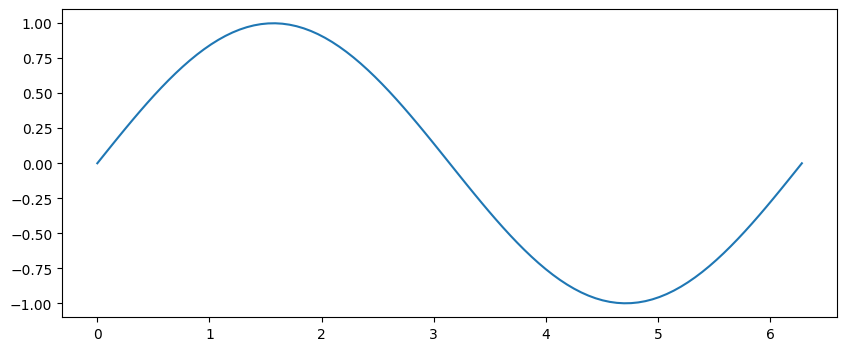

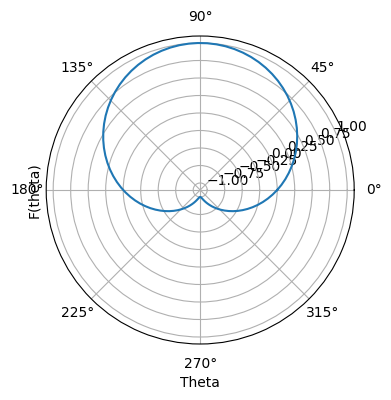

In [13]:
x = np.linspace(0,np.pi*2, 100)
y = np.sin(x)

plt.figure(1,figsize=(10,4))
plt.plot(x,y)
plt.figure(2,figsize=(10,4))
plt.polar(x,y)
plt.xlabel("Theta")
plt.ylabel("F(theta)")
plt.show()